# Testing whether what's being measured varies by site type

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

from datetime import date, timedelta
from sklearn.cluster import KMeans
from sklearn.preprocessing import Imputer
from mpl_toolkits.basemap import Basemap

pd.options.display.max_columns = None

In [6]:
data = pd.read_csv('../data/water/CA-results-join.csv.bz2', 
                   low_memory=False, 
                   usecols=['MonitoringLocationIdentifier', 'MonitoringLocationTypeName',
                            'CountyName', 'ActivityMediaSubdivisionName', 'Measure', 
                            'MeasureGroup'])
data.MeasureGroup = data.MeasureGroup.str.strip()

In [8]:
xtab = pd.crosstab(data.MonitoringLocationTypeName, data.MeasureGroup)
xtab

MeasureGroup,"1,1,1-Trichloroethane","1,1,2-Trichloroethane","1,1-Dichloroethylene","1,2,4-Trichlorobenzene","1,2-Dibromo-3-chloropropane","1,2-Dichloroethane","1,2-Dichloropropane","2,4-D",Alachlor,Antimony,Arsenic,Asbestos,Atrazine,Barium,Benzene,Benzo[a]pyrene,Beryllium,Cadmium,Carbofuran,Carbon tetrachloride,Chlordane,Chlorine,Chlorobenzene,Chromium,Copper,Cyanide,Di(2-ethylhexyl) phthalate,Dinoseb,Endrin,Ethylbenzene,Ethylene dibromide,Fluoride,Glyphosate,HAA5,Heptachlor,Heptachlor epoxide,Hexachlorobenzene,Lead,Lindane,Mercury,Methoxychlor,Oxamyl,PCBs,Pentachlorophenol,Picloram,Selenium,Silvex,Simazine,Styrene,TTHMs,Tetrachloroethylene,Thallium,Toluene,Toxaphene,Trichloroethylene,Vinyl chloride,"cis-1,2-Dichloroethylene",dioxin,nitrate,nitrite,o-Dichlorobenzene,p-Dichlorobenzene,"trans-1,2-Dichloroethylene",xylene
MonitoringLocationTypeName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Atmosphere,0,0,0,0,0,0,0,0,6,0,0,0,5,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,243,0,0,0,0,0,0,0,0,0,0,306,391,0,0,0,0
BEACH Program Site-Ocean,0,0,0,0,0,0,0,0,0,0,238,0,0,0,0,49,0,217,0,0,0,0,0,227,228,0,0,0,0,0,0,0,0,0,0,0,0,211,0,131,0,0,0,0,0,211,0,0,0,0,0,0,0,0,0,0,0,0,149,6,0,0,0,0
CERCLA Superfund Site,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,1,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Canal Drainage,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,4,0,0,0,0
Canal Irrigation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Cave,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,0,0,0,0,0
Channelized Stream,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0
Estuary,0,0,0,0,0,0,0,0,0,0,358,0,13,9,2,0,4,151,0,0,0,0,0,324,493,0,0,0,0,0,0,13,2,0,0,0,0,336,0,61,0,0,1,0,0,32,0,85,0,4,0,0,3,0,0,0,0,0,4444,5858,0,0,0,2
Facility Municipal Sewage (POTW),0,0,0,0,0,0,0,0,0,0,6,2,0,0,0,0,0,0,0,0,0,76,0,5,24,13,11,0,0,0,0,0,0,0,0,0,0,18,0,0,0,0,0,0,0,6,0,0,0,16,0,0,2,0,0,0,0,1,8,0,0,2,0,3


In [19]:
# Getting % of measurements by location type

sums = xtab.sum(axis=1)
xtab_pct = xtab.div(sums, axis=0)
xtab_pct

MeasureGroup,"1,1,1-Trichloroethane","1,1,2-Trichloroethane","1,1-Dichloroethylene","1,2,4-Trichlorobenzene","1,2-Dibromo-3-chloropropane","1,2-Dichloroethane","1,2-Dichloropropane","2,4-D",Alachlor,Antimony,Arsenic,Asbestos,Atrazine,Barium,Benzene,Benzo[a]pyrene,Beryllium,Cadmium,Carbofuran,Carbon tetrachloride,Chlordane,Chlorine,Chlorobenzene,Chromium,Copper,Cyanide,Di(2-ethylhexyl) phthalate,Dinoseb,Endrin,Ethylbenzene,Ethylene dibromide,Fluoride,Glyphosate,HAA5,Heptachlor,Heptachlor epoxide,Hexachlorobenzene,Lead,Lindane,Mercury,Methoxychlor,Oxamyl,PCBs,Pentachlorophenol,Picloram,Selenium,Silvex,Simazine,Styrene,TTHMs,Tetrachloroethylene,Thallium,Toluene,Toxaphene,Trichloroethylene,Vinyl chloride,"cis-1,2-Dichloroethylene",dioxin,nitrate,nitrite,o-Dichlorobenzene,p-Dichlorobenzene,"trans-1,2-Dichloroethylene",xylene
MonitoringLocationTypeName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Atmosphere,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006179,0.000000,0.000000,0.000000,0.005149,0.000000,0.000000,0.000000,0.000000,0.000000,0.012358,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007209,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.001030,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.315139,0.402678,0.000000,0.000000,0.000000,0.000000
BEACH Program Site-Ocean,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142771,0.000000,0.000000,0.000000,0.000000,0.029394,0.000000,0.130174,0.000000,0.000000,0.000000,0.000000,0.000000,0.136173,0.136773,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.126575,0.000000,0.078584,0.000000,0.000000,0.000000,0.000000,0.000000,0.126575,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.089382,0.003599,0.000000,0.000000,0.000000,0.000000
CERCLA Superfund Site,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.411765,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.294118,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.235294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Canal Drainage,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,0.400000,0.000000,0.000000,0.000000,0.000000
Canal Irrigation,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Cave,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

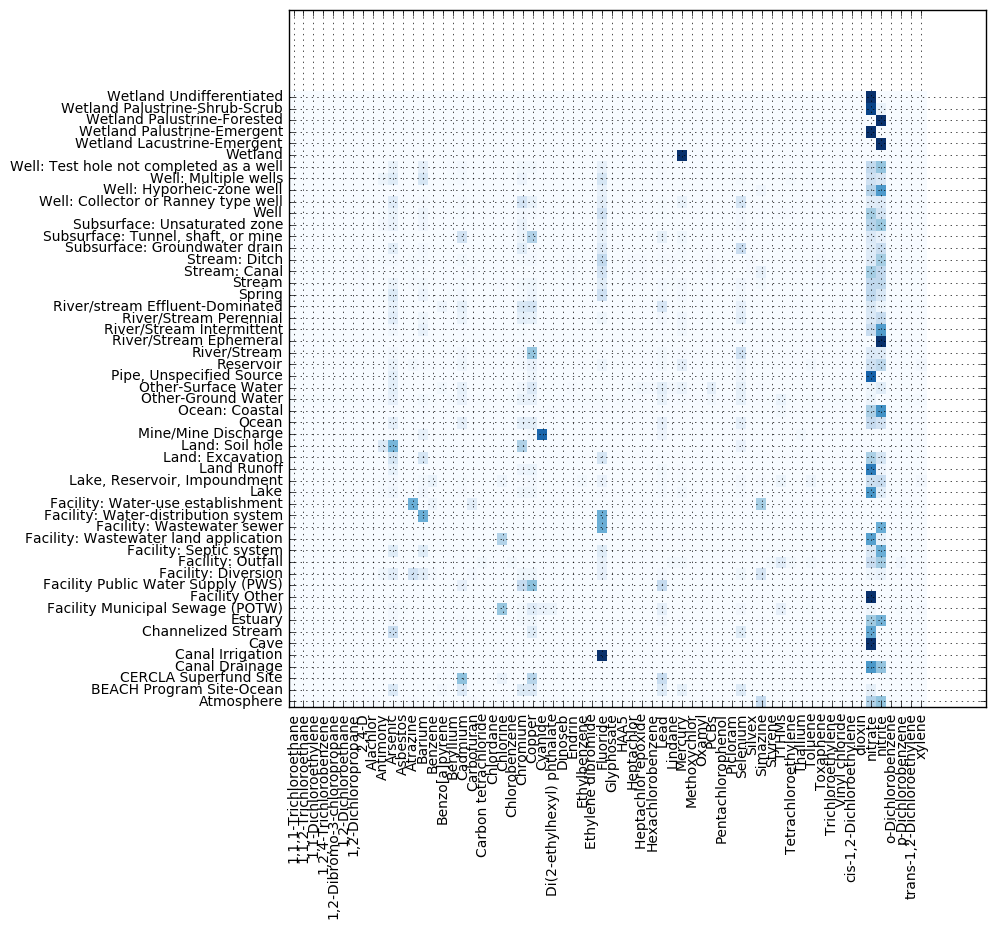

In [20]:
# Plotting that visually

plt.figure(figsize=(9,9))
plt.pcolor(xtab_pct, cmap='Blues')
plt.grid(b=True)
yticks = plt.yticks(np.arange(0.5, len(xtab_pct.index), 1), xtab_pct.index)
xticks = plt.xticks(np.arange(0.5, len(xtab_pct.columns), 1), xtab_pct.columns, rotation='vertical')